# 1. 헬로우 딥러닝 MNIST


---


![대체 텍스트](https://i.imgur.com/Un7aQtW.png)

출처 : 밑바닥부터 시작하는 딥러닝

MNIST란? 0-9까지의 손글씨로 쓴 숫자 데이터

미니배치 : 데이터를 적당한 크기로 잘라서 학습

ex) 60,000장의 훈련 데이터중에서 100장을 무작위 뽑아서 100장만을 학습 (밑바닥부터 시작하는 딥러닝에서 나온 내용)

에포크 : 학습 데이터 전체를 한 바퀴 도는 것

In [3]:
# !pip install --upgrade tensorflow

# !pip install numpy
# !pip install matplotlib
# !pip install pillow

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 784])
# 결과는 0~9 의 10 가지 분류를 가집니다.
Y = tf.placeholder(tf.float32, [None, 10])

# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.406
Epoch: 0002 Avg. cost = 0.149
Epoch: 0003 Avg. cost = 0.099
Epoch: 0004 Avg. cost = 0.071
Epoch: 0005 Avg. cost = 0.055
Epoch: 0006 Avg. cost = 0.041
Epoch: 0007 Avg. cost = 0.035
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.020
Epoch: 0010 Avg. cost = 0.019
Epoch: 0011 Avg. cost = 0.015
Epoch: 0012 Avg. cost = 0.014
Epoch: 0013 Avg. cost = 0.011
Epoch: 0014 Avg. cost = 0.013
Epoch: 0015 Avg. cost = 0.010
최적화 완료!
정확도: 0.9783


![대체 텍스트](https://i.imgur.com/tGpF9Mz.png)

출처 : 밑바닥부터 시작하는 딥러닝

드롭아웃 : 학습 시 전체 신경망 중 일부만을 사용하도록 하는 것

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.418
Epoch: 0002 Avg. cost = 0.164
Epoch: 0003 Avg. cost = 0.114
Epoch: 0004 Avg. cost = 0.090
Epoch: 0005 Avg. cost = 0.072
Epoch: 0006 Avg. cost = 0.061
Epoch: 0007 Avg. cost = 0.053
Epoch: 0008 Avg. cost = 0.046
Epoch: 0009 Avg. cost = 0.040
Epoch: 0010 Avg. cost = 0.038
Epoch: 0011 Avg. cost = 0.034
Epoch: 0012 Avg. cost = 0.033
Epoch: 0013 Avg. cost = 0.030
Epoch: 0014 Avg. cost = 0.029
Epoch: 0015 Avg. cost = 0.026
Epoch: 0016 Avg. cost = 0.026
Epoch: 0017 Avg. cost = 0.023
Epoch: 0018 Avg. cost = 0.020
Epoch: 0019 Avg. cost = 0.022
Epoch: 0020 Avg. cost = 0.022
Epoch: 0021 Avg. cost = 0.022
Epoch: 0022 Avg. cost = 0.018
Epoch: 0023 Avg. cost = 0.018
Epoch: 0024 Avg. cost = 0.021
Epoch: 0025 Avg. cost = 0.020
Epoch: 0026 Avg. cost = 0.016
Epoch: 0027 Avg. c

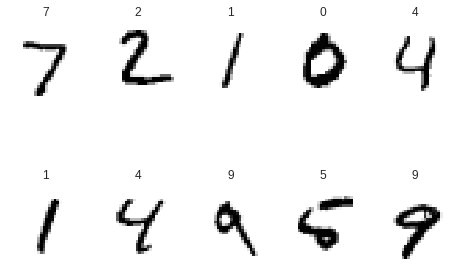

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

#########
# 결과 확인 (matplot)
######
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

# 2. 붓꽃 데이터


---


https://www.kaggle.com/uciml/iris/data

캐글 데이터 참조 

원본데이터 Iris.csv 참조

https://thebook.io/006723/ch04/01/
Iris 각 특성값들 참조

In [0]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

# 가공한 붓꽃 트레이닝 데이터 입력
xy = np.loadtxt('https://raw.githubusercontent.com/Crpediem/deeprunning-study/master/180317/Iris_train.csv',delimiter=',',
                dtype=np.float32)
x_data = xy[:,0:4]
y_data = xy[:,4:7]

# 가공한 붓꽃 테스트 데이터 입력
test_xy = np.loadtxt('https://raw.githubusercontent.com/Crpediem/deeprunning-study/master/180317/Iris_test.csv',delimiter=',',
                dtype=np.float32)

x_test = test_xy[:,0:4]
y_test = test_xy[:,4:7]

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 3])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([4, 10], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([10, 10], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([10, 3], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(1000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data, keep_prob: 0.8})

    if (step + 1) % 100 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data, keep_prob: 0.8}))

#########
# 결과 확인
# 0: Iris-setosa 1: Iris-versicolor, 2: Iris-virginica
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_test, keep_prob: 1}))
print('실제값:', sess.run(target, feed_dict={Y: y_test, keep_prob: 1}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_test, Y: y_test, keep_prob: 1}))

100 0.23863082
200 0.23964703
300 0.18831006
400 0.23864982
500 0.19743586
600 0.19411115
700 0.18276615
800 0.19053736
900 0.20052955
1000 0.2167687
예측값: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
실제값: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
정확도: 100.00


## csv 파일 데이터 분류

#### 1단계. 데이터 다듬기 

캐글의 원본 csv에서 train과 test에서 사용되지 않을 id값과 label값을 삭제하고
분류되는 값인 Iris-setosa, Iris-versicolor, Iris-virginica을 one-hot 형식으로 변환시켜줍니다.
예) Iris-setosa = 100, Iris-versicolor = 010, Iris-virginica = 001

#### 2단계. train과 test 데이터 나누기

분류한 값을 저장 후 test와 train할 값을 나누어 각각 다른 csv로 저장합니다.

#### 3단계. python list split

생성한 csv에서 학습할 값과 분류되는 값을 분류하여 x_data,y_data에 저장합니다.
test할 데이터도 동일하게 진행합니다.

# 3. Wine data


---


https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

위 주소에서 제공하는 데이터를 가지고 위의 소개한 방법으로 csv파일 분류을 동일하게 진행하여 학습해보도록 하겠습니다.


In [16]:
import tensorflow as tf
import numpy as np

# 가공한 트레이닝 데이터 입력
xy = np.loadtxt('https://raw.githubusercontent.com/Crpediem/deeprunning-study/master/180317/wine_train.csv',delimiter=',',
                dtype=np.float32)
x_data = xy[:,0:13]
y_data = xy[:,13:16]

# 가공한 테스트 데이터 입력
test_xy = np.loadtxt('https://raw.githubusercontent.com/Crpediem/deeprunning-study/master/180317/wine_test.csv',delimiter=',',
                dtype=np.float32)

x_test = test_xy[:,0:13]
y_test = test_xy[:,13:16]

# print(x_data)
# print(y_data)

#########
# 신경망 모델 구성
#####
X = tf.placeholder(tf.float32, [None, 13])
Y = tf.placeholder(tf.float32, [None, 3])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([13, 100], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([100, 100], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([100, 3], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(1000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data, keep_prob: 0.8})

    if (step + 1) % 100 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data, keep_prob: 0.8}))

#########
# 결과 확인
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_test, keep_prob: 1}))
print('실제값:', sess.run(target, feed_dict={Y: y_test, keep_prob: 1}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_test, Y: y_test, keep_prob: 1}))

100 0.5879292
200 0.1710964
300 0.11573343
400 0.08524342
500 0.07245682
600 0.066718794
700 0.082000956
800 0.09255613
900 0.0823765
1000 0.080762655
예측값: [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
실제값: [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
정확도: 100.00


# 4. CNN (합성곱 신경망)


---


CNN은 기본적으로 컨볼루션 계층(convolution layer, 합성곱 계층)과 폴링 계층(pooling layer)로 구성됨.

값을 압축할 때 컨볼루션 계층은 가중치와 편향을 적용하고 풀링계층은 단순히 값들 중 하나를 선택해서 가져오는 방식.

스트라이드 : 몇 칸씩 움직일지 정하는 값

커널, 필터 : 가중치와 필터

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

#########
# 신경망 모델 구성
######
# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듭니다.
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
#print("X:",X)
Y = tf.placeholder(tf.float32, [None, 10])
#print("Y:",Y)
keep_prob = tf.placeholder(tf.float32)

# 각각의 변수와 레이어는 다음과 같은 형태로 구성됩니다.
# W1 [3 3 1 32] -> [3 3]: 커널 크기, 1: 입력값 X 의 특성수, 32: 필터 갯수
# L1 Conv shape=(?, 28, 28, 32)
#    Pool     ->(?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
print('W1 : ',W1)
# tf.nn.conv2d 를 이용해 한칸씩 움직이는 컨볼루션 레이어를 쉽게 만들 수 있습니다.
# padding='SAME' 은 커널 슬라이딩시 최외곽에서 한칸 밖으로 더 움직이는 옵션
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
print('L1 : ',L1)
L1 = tf.nn.relu(L1)
print('L1 : ',L1)
# Pooling 역시 tf.nn.max_pool 을 이용하여 쉽게 구성할 수 있습니다.
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')
print('L1 : ',L1)
# L1 = tf.nn.dropout(L1, keep_prob)

# L2 Conv shape=(?, 14, 14, 64)
#    Pool     ->(?, 7, 7, 64)
# W2 의 [3, 3, 32, 64] 에서 32 는 L1 에서 출력된 W1 의 마지막 차원, 필터의 크기 입니다.
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
print('W2 : ',W2)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
print('L2 : ',L2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')
print('L2 : ',L2)
L2 = tf.nn.dropout(L2, keep_prob)

# FC 레이어: 입력값 7x7x64 -> 출력값 256
# Full connect를 위해 직전의 Pool 사이즈인 (?, 7, 7, 64) 를 참고하여 차원을 줄여줍니다.
#    Reshape  ->(?, 256)
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
print('W3 : ',W3)
L3 = tf.reshape(L2,[-1,7 * 7 * 64])
print('L3 : ',L3)
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
print('L3 : ',L3)
L3 = tf.nn.dropout(L3, keep_prob)

# 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서 0~9 레이블인 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
print('W4 : ',W4)
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
#optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(cost)
# 최적화 함수를 RMSPropOptimizer 로 바꿔서 결과를 확인해봅시다.
# optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
  total_cost = 0
  
  for i in range(total_batch):
    # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    batch_xs = batch_xs.reshape(-1, 28, 28, 1)
    
    _, cost_val = sess.run([optimizer, cost],feed_dict={X : batch_xs, Y : batch_ys, keep_prob : 0.7})
    total_cost += cost_val
    
  print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =','{:.3f}'.format(total_cost / total_batch))
  
print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도:',sess.run(accuracy,feed_dict={X:mnist.test.images.reshape(-1, 28, 28, 1),Y:mnist.test.labels,keep_prob:1}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
W1 :  <tf.Variable 'Variable_19:0' shape=(3, 3, 1, 32) dtype=float32_ref>
L1 :  Tensor("Conv2D_8:0", shape=(?, 28, 28, 32), dtype=float32)
L1 :  Tensor("Relu_14:0", shape=(?, 28, 28, 32), dtype=float32)
L1 :  Tensor("MaxPool_8:0", shape=(?, 14, 14, 32), dtype=float32)
W2 :  <tf.Variable 'Variable_20:0' shape=(3, 3, 32, 64) dtype=float32_ref>
L2 :  Tensor("Conv2D_9:0", shape=(?, 14, 14, 64), dtype=float32)
L2 :  Tensor("MaxPool_9:0", shape=(?, 7, 7, 64), dtype=float32)
W3 :  <tf.Variable 'Variable_21:0' shape=(3136, 256) dtype=float32_ref>
L3 :  Tensor("Reshape_4:0", shape=(?, 3136), dtype=float32)
L3 :  Tensor("Relu_16:0", shape=(?, 256), dtype=float32)
W4 :  <tf.Variable 'Variable_22:0' shape=(256, 10) dtype=float32_ref>
Epoch: 0001 Avg. cost = 0.759
Epoch: 0002 Avg. cost = 0.124
Epoch:

In [4]:
# 신경망 구성을 손쉽게 해 주는 유틸리티 모음인 tensorflow.layers 를 사용해봅니다.
# 01 - CNN.py 를 재구성한 것이니, 소스를 한 번 비교해보세요.
# 이처럼 TensorFlow 에는 간단하게 사용할 수 있는 다양한 함수와 유틸리티들이 매우 많이 마련되어 있습니다.
# 다만, 처음에는 기본적인 개념에 익숙히지는 것이 좋으므로 이후에도 가급적 기본 함수들을 이용하도록 하겠습니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
#print("X:",X)
Y = tf.placeholder(tf.float32, [None, 10])
#print("Y:",Y)
is_training = tf.placeholder(tf.bool)

# 기본적으로 inputs, outputs size, kernel_size 만 넣어주면
# 활성화 함수 적용은 물론, 컨볼루션 신경망을 만들기 위한 나머지 수치들은 알아서 계산해줍니다.
# 특히 Weights 를 계산하는데 xavier_initializer 를 쓰고 있는 등,
# 크게 신경쓰지 않아도 일반적으로 효율적인 신경망을 만들어줍니다.
L1 = tf.layers.conv2d(X, 32, [3, 3])
L1 = tf.layers.max_pooling2d(L1, [2, 2], [2, 2])
L1 = tf.layers.dropout(L1 ,0.7, is_training)

L2 = tf.layers.conv2d(L1, 64, [3, 3])
L2 = tf.layers.max_pooling2d(L2, [2, 2], [2, 2])
L2 = tf.layers.dropout(L2, 0.7, is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3,256,activation=tf.nn.relu)
L3 = tf.layers.dropout(L3, 0.5, is_training)

model = tf.layers.dense(L3, 10, activation=None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
#optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
  total_cost = 0
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    batch_xs = batch_xs.reshape(-1, 28, 28, 1)
    
    _, cost_val = sess.run([optimizer, cost],feed_dict={X : batch_xs, Y : batch_ys, is_training: True})
    total_cost += cost_val
    
  print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =','{:.3f}'.format(total_cost / total_batch))
  
print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도:',sess.run(accuracy,feed_dict={X:mnist.test.images.reshape(-1, 28, 28, 1),Y:mnist.test.labels,is_training:False}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.584
Epoch: 0002 Avg. cost = 0.193
Epoch: 0003 Avg. cost = 0.199
Epoch: 0004 Avg. cost = 0.226
Epoch: 0005 Avg. cost = 0.223
Epoch: 0006 Avg. cost = 0.218
Epoch: 0007 Avg. cost = 0.242
Epoch: 0008 Avg. cost = 0.257
Epoch: 0009 Avg. cost = 0.239
Epoch: 0010 Avg. cost = 0.265
Epoch: 0011 Avg. cost = 0.264
Epoch: 0012 Avg. cost = 0.301
Epoch: 0013 Avg. cost = 0.301
Epoch: 0014 Avg. cost = 0.258
Epoch: 0015 Avg. cost = 0.281
최적화 완료!
정확도: 0.9875


# 5. 밑바닥부터 시작하는 딥러닝 ( 챕터 7. CNN - 합성곱 )


---


합성곱 계층의 입출력데이터 : 특징맵(feature map)

합성곱의 입력데이터 : 입력 특징맵(input feature map)

합성곱의 출력데이터 : 출력 특징맵(output feature map)

![대체 텍스트](https://i.imgur.com/EUE2Sil.png)

출처 : 밑바닥부터 시작하는 딥러닝

합성곱의 연산은 위와 같은 과정으로 연산되게 됩니다.


![대체 텍스트](https://i.imgur.com/fiGeQH2.png)

출처 : 밑바닥부터 시작하는 딥러닝

패딩(padding) : 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값(0)으로 채우는 것

![대체 텍스트](https://i.imgur.com/CNpTYcC.png)

출처 : 밑바닥부터 시작하는 딥러닝

스트라이드(stride) : 필터를 적용하는 위치의 간격

http://cs231n.github.io/convolutional-networks/

-합성곱 연산의 '움직이는 데모'

https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html

-웹에서 보는 MNIST의 CNN 과정

폴링계층의 특징

1.   학습해야 할 매개변수가 없다
2.   채널 수가 변하지 않는다
3.   입력의 변화에 영향을 적게 받는다(강건하다)

정리

* 대표적인 CNN에는 LeNet와 AlexNex이 있다.
* 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여하였다.




# 6. 밑바닥부터 시작하는 딥러닝( 챕터8 - 딥러닝 )


---


## 6-1. VGG


![대체 텍스트](https://i.imgur.com/XW4Dxdf.png)

출처 :  밑바닥부터 시작하는 딥러닝

VGG : 합성곱 계층과 풀링 계층으로 구성되는 '기본적'인 CNN

합성곱 계층, 완전연결 계층을 모두 16층(혹은 19층)으로 심화한게 특징

층의 깊이에 따라서 'VGG16', 'VGG19'로 구분 됨

3X3의 작은 필터를 사용한 합성곱 계층을 연속으로 거치며 합성곱 계층을 2-4회 연속으로 풀링 계층을 두어 크기를 전반으로 줄이는 처리를 반복하고 마지막에는 완전연결 계층을 통과시켜 결과를 출력

## 6-2. GoogLeNet

![대체 텍스트](https://i.imgur.com/4e2uF62.png)

출처 : 밑바닥부터 시작하는 딥러닝

GoogLeNet 구성이며 사각형은 합성곱 계층과 폴링 계층등의 계층을 나타냄

GoogLeNet은 세로 방향 깊이뿐 아니라 가로 방향도 깊다는 점이 특징


![대체 텍스트](https://i.imgur.com/ehXolg6.png)

출처 : 밑바닥부터 시작하는 딥러닝

GoogLeNet의 인셉션 구조입니다.

(인셉션 : GoogLeNet의 가로 방향 '폭')

인셉션 : 크기가 다른 필터(와 풀링)를 여러 개 적용하여 그 결과를 결합하는 것.

GoogLeNet에서 1x1크기의 필터를 사용한 합성곱 계층을 많은 곳에 사용한 이유 : 1x1의 합성곱 연산은 매개변수 제거와 고속처리에 기여함

## 6-3. ResNet

![대체 텍스트](https://i.imgur.com/5rf3LUn.png)

출처 : 밑바닥부터 시작하는 딥러닝

딥러닝의 학습에서는 층이 지나치게 깊으면 학습이 잘 되지 않고, 오히려 성능이 떨어지는 경우가 많음

ResNet은 이러한 문제를 해결하기 위해서 스킵 연결(skip connection)을 도입

스킵 연결 : 입력 데이터를 합성곱 계층을 건너뛰어 출력에 바로 더하는 구조

스킵 연결은 역전파 때 스킨 연결이 심호감쇠를 막아줘서 층이 깊어져도 학습이 효율적으로 할 수 있도록 해줍니다.

ResNet은 합성곱 계층을 2개 층마다 건너뛰면서 층을 깊게 함

## 6-4. 딥러닝의 활용

-사물 검출 : 이미지 속에 담긴 사물의 위치와 종류(클래스)를 알아내는 기술(R-CNN, Faster R-CNN)

-분할 : 이미지를 픽셀 수준에서 분류하는 문제(FCN)

-사진 캡션 생성(NIC)

## 6-5. 딥러닝의 미래

-이미지 스타일(화풍) 변환(Prisma 앱 : http://prisma-ai.com/)

-이미지생성(DCGAN) : 대량의 이미지를 사용하여 학습하여 학습이 끝난 후 아무런 입력 이미지 없이도 새로운 이미지를 생성

-자율주행(SegNet)

-Deep Q-Network(강화학습) : 에이전트는 더 좋은 보상을 받기 위해 스스로 학습

![대체 텍스트](https://i.imgur.com/dlVBtOz.png)

출처 : 밑바닥부터 시작하는 딥러닝

보상은 정해진 것이 아니라 '예상 보상'

DQN은 Q학습이라는 강화학습 알고리즘을 기초로 함

Q학습에서는 최적 행동 가치 함수로 최적인 행동을 정함

이 함수를 CNN으로 비슷하게 흉내 내어 사용하는 것이 DQN

![대체 텍스트](https://i.imgur.com/SYtc9Gp.png)

출처 : 밑바닥부터 시작하는 딥러닝

DQN에서 사용하는 CNN은 게임 영상 프레임(4개의 연속한 프레임)을 입력하여 최종적으로 겡미을 제어하는 움직임(조이스틱 이동량이나 버튼 조작 여부)에 대하여 각 동작의 '가치'를 출력

# 7. AutoEncoder

---

오토인코더 : 비지도 학습 중 가장 널리 쓰이는 신경망

오토인코더는 입력값과 출력값을 같게 하는 신경망이며, 가운데 계층의 노드 수가 입력값보다 적은 것이 특징

이런 구조라서 입력 데이터를 압축하는 효과를 얻게 되고, 노이즈 제거에도 매우 효과적이라고 알려짐

오토인코더의 핵심은 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 내보내고, 

은닉층의 데이터를 디코더를 통해 출력층으로 내보낸 뒤,

만들어진 출력값을 입력값과 비슷해지도록 만드는 가중치를 찾아내는 것

오토인코더 방식 : 변이형 오토인코더(Variational Autoencoder), 잡음제거 오토인코더(Denoising Autoencoder) 등

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost =  0.0598
Epoch: 0002 Avg. cost =  0.0362
Epoch: 0003 Avg. cost =  0.0315
Epoch: 0004 Avg. cost =  0.0285
Epoch: 0005 Avg. cost =  0.0269
Epoch: 0006 Avg. cost =  0.0262
Epoch: 0007 Avg. cost =  0.0254
Epoch: 0008 Avg. cost =  0.0248
Epoch: 0009 Avg. cost =  0.0245
Epoch: 0010 Avg. cost =  0.0243
Epoch: 0011 Avg. cost =  0.0240
Epoch: 0012 Avg. cost =  0.0237
Epoch: 0013 Avg. cost =  0.0236
Epoch: 0014 Avg. cost =  0.0233
Epoch: 0015 Avg. cost =  0.0230
Epoch: 0016 Avg. cost =  0.0230
Epoch: 0017 Avg. cost =  0.02

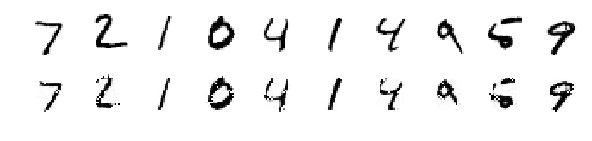

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

#########
# 신경망 모델 구성
######
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X =  tf.placeholder(tf.float32,[None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode =  tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode =  tf.Variable(tf.random_normal([n_hidden]))

# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode),b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

# 디코더 레이어 구성
# 이 디코더가 최종 모델이 됩니다.
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode),b_decode))

# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
cost = tf.reduce_mean(tf.pow(X - decoder,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
  total_cost = 0
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _,cost_val =  sess.run([optimizer, cost], feed_dict={X:batch_xs})
    total_cost += cost_val
    
  print('Epoch:','%04d' % (epoch + 1),'Avg. cost = ','{:.4f}'.format(total_cost / total_batch))
  
print('최적화 완료!')

#########
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해봅니다.
######
sample_size = 10

samples = sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]})

fig, ax =  plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i],(28, 28)))
  ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
  
plt.show()

# 8. AutoEncoder 정리

오토 인코더 학습 과정

1. 인풋과 히든레이어의 가중치를 계산해 시그모이드 함수를 통과시킴
2. 1의 결과물과 출력 레이어의 가중치를 계산해서 시그모이드 함수를 통과시킴
3. 2의 값을 이용해 MSE(Mean Squarded Error)를 계산
4. 3의 결과로 나온 loss 값을 SGD등으로 최적화시킴
5. 오류역전파를 사용하여 가중치를 갱신

Stacked AutoEncoder : hidden layer를 여러 개 쌓아서 구현한 AutoEncoder

Denoising AutoEncoder : 잡음을 제거할 수 있는 AutoEncoder (복원 능력을 더 강화하기 위해 기본적인 autoencoder의 학습방법을 변형시킴)